In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import os

notebook_path = os.getcwd()
weights_file_path=f"{notebook_path}/p05_advertising_sklearn_SGDRegressor_weights.npy"

In [68]:
csv_train_path = f"{notebook_path}/advertising_data/train_advertising_data.csv"
csv_test_path = f"{notebook_path}/advertising_data/test_advertising_data.csv"

In [69]:
df= pd.read_csv(csv_train_path)   
df.drop(columns=['Unnamed: 0'], inplace=True)
# df.head()

X_train = np.array(df.drop(columns=['Sales']))
y_train = np.array(df['Sales'])
X_train.shape,y_train.shape

((160, 3), (160,))

In [70]:
df= pd.read_csv(csv_test_path)   
df.drop(columns=['Unnamed: 0'], inplace=True)
# df.head()

X_test = np.array(df.drop(columns=['Sales']))
y_test = np.array(df['Sales'])
X_feature_names = np.array(df.drop(columns=['Sales']).columns)
y_target_name = 'Sales'
X_test.shape,y_test.shape

((40, 3), (40,))

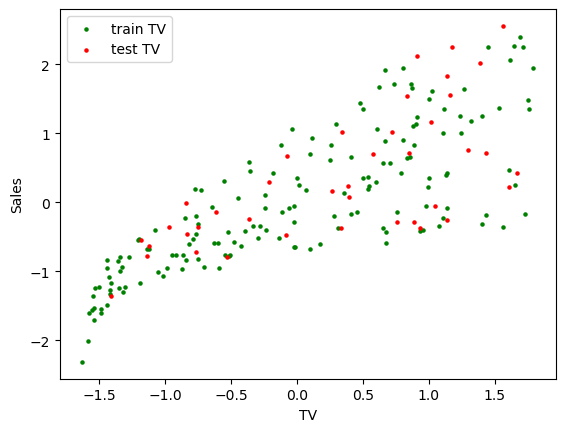

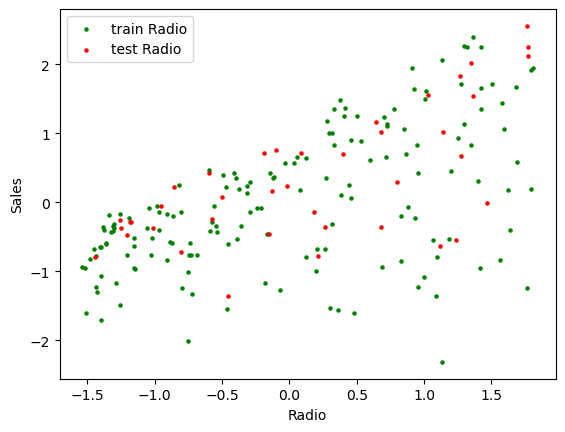

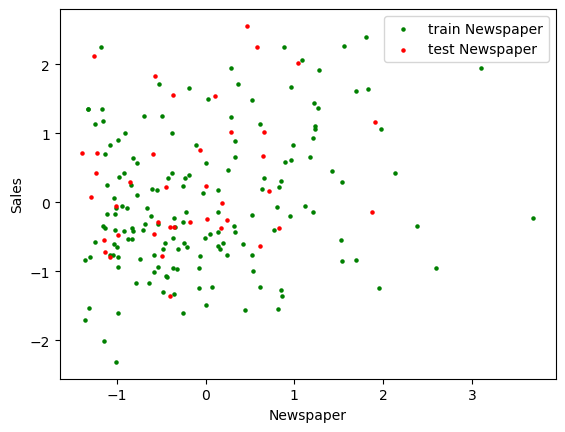

In [71]:
for i in range(X_train.shape[1]):
    plt.scatter(X_train[:, i], y_train, s=5,label=f'train {X_feature_names[i]}',c="green")
    plt.scatter(X_test[:, i], y_test, s=5,label=f'test {X_feature_names[i]}',c="red")

    plt.xlabel(X_feature_names[i])
    plt.ylabel(y_target_name)
    
    plt.legend()
    plt.show()
    plt.close()

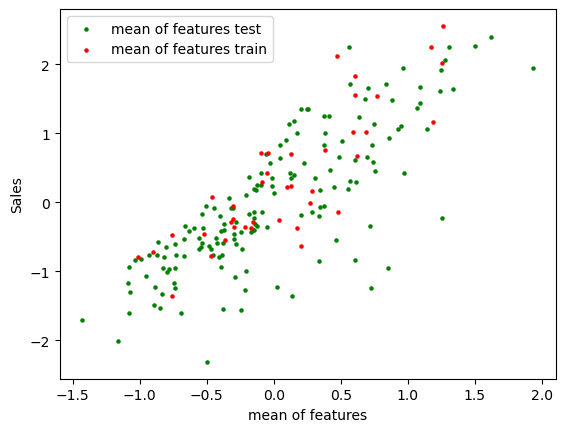

In [72]:
X_train_mean=np.mean(X_train, axis=1)
X_train_mean.shape

X_test_mean=np.mean(X_test, axis=1)

plt.scatter(X_train_mean, y_train, s=5,label=f'mean of features test',c="green")
plt.scatter(X_test_mean, y_test, s=5,label=f'mean of features train',c="red")

plt.xlabel('mean of features')
plt.ylabel(y_target_name)

plt.legend()
plt.show()
plt.close()

In [73]:
n,m=X_train.shape

In [74]:
model=SGDRegressor(eta0=0.01,max_iter=1000,verbose=1)
model.fit(X_train,y_train)
w0=model.intercept_
w1_=model.coef_
w0,w1_

-- Epoch 1
Norm: 0.44, NNZs: 3, Bias: 0.007282, T: 160, Avg. loss: 0.284377
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3, Bias: 0.004409, T: 320, Avg. loss: 0.136190
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.70, NNZs: 3, Bias: 0.003820, T: 480, Avg. loss: 0.092575
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.76, NNZs: 3, Bias: 0.003270, T: 640, Avg. loss: 0.074479
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.80, NNZs: 3, Bias: 0.002170, T: 800, Avg. loss: 0.065926
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.83, NNZs: 3, Bias: 0.001186, T: 960, Avg. loss: 0.061446
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.85, NNZs: 3, Bias: 0.001159, T: 1120, Avg. loss: 0.058959
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.86, NNZs: 3, Bias: 0.000959, T: 1280, Avg. loss: 0.057498
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.87, NNZs: 3, Bias: 0.000040, T: 1440, Avg. loss: 0.056577
Total training time: 0.00 seconds

(array([0.00098714]), array([0.75612682, 0.48410056, 0.02099353]))

In [75]:
yhat_train=model.predict(X_train)
print(yhat_train.shape)

(160,)


In [76]:
yhat_test=model.predict(X_test)
print(yhat_test.shape)

(40,)


In [77]:
print(f"Score on train: {model.score(X_train,y_train):.4f}")
print(f"Score on test: {model.score(X_test,y_test):.4f}")

Score on train: 0.8905
Score on test: 0.9032
